In [5]:
!uv pip install -r ../requirements.txt

Using Python 3.11.9 environment at: C:\Users\dell\Desktop\projects\thyroid_cancer\.venv
Resolved 126 packages in 4.67s
   Building htmlmin==0.1.12
      Built htmlmin==0.1.12
Prepared 8 packages in 3.45s
Installed 106 packages in 6.04s
 + alembic==1.16.4
 + annotated-types==0.7.0
 + anyio==4.10.0
 + attrs==25.3.0
 + blinker==1.9.0
 + cachetools==5.5.2
 + certifi==2025.8.3
 + charset-normalizer==3.4.3
 + click==8.2.1
 + cloudpickle==3.1.1
 + contourpy==1.3.3
 + cycler==0.12.1
 + dacite==1.9.2
 + databricks-sdk==0.62.0
 + dnspython==2.7.0
 + docker==7.1.0
 + email-validator==2.2.0
 + fastapi==0.116.1
 + fastapi-cli==0.0.8
 + fastapi-cloud-cli==0.1.5
 + flask==3.1.1
 + fonttools==4.59.0
 + gitdb==4.0.12
 + gitpython==3.1.45
 + google-auth==2.40.3
 + graphene==3.4.3
 + graphql-core==3.2.6
 + graphql-relay==3.2.0
 + greenlet==3.2.4
 + h11==0.16.0
 + htmlmin==0.1.12
 + httpcore==1.0.9
 + httptools==0.6.4
 + httpx==0.28.1
 + idna==3.10
 + imagehash==4.3.1
 + importlib-metadata==8.7.0
 + itsda

### Data

In [6]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

# Load the CSV file into a DataFrame
df = pd.read_csv("dataset.csv")

# Display basic info
print(f"Shape: {df.shape}")
df.head()


Shape: (383, 17)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [7]:
# Data types and non-null counts
print("\n--- Data Info ---")
df.info()

# Summary statistics (for numeric features)
print("\n--- Summary Statistics ---")
display(df.describe())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response             

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [8]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical Features ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical Features ({len(numerical_cols)}): {numerical_cols}")



Categorical Features (16): ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
Numerical Features (1): ['Age']


### Plots

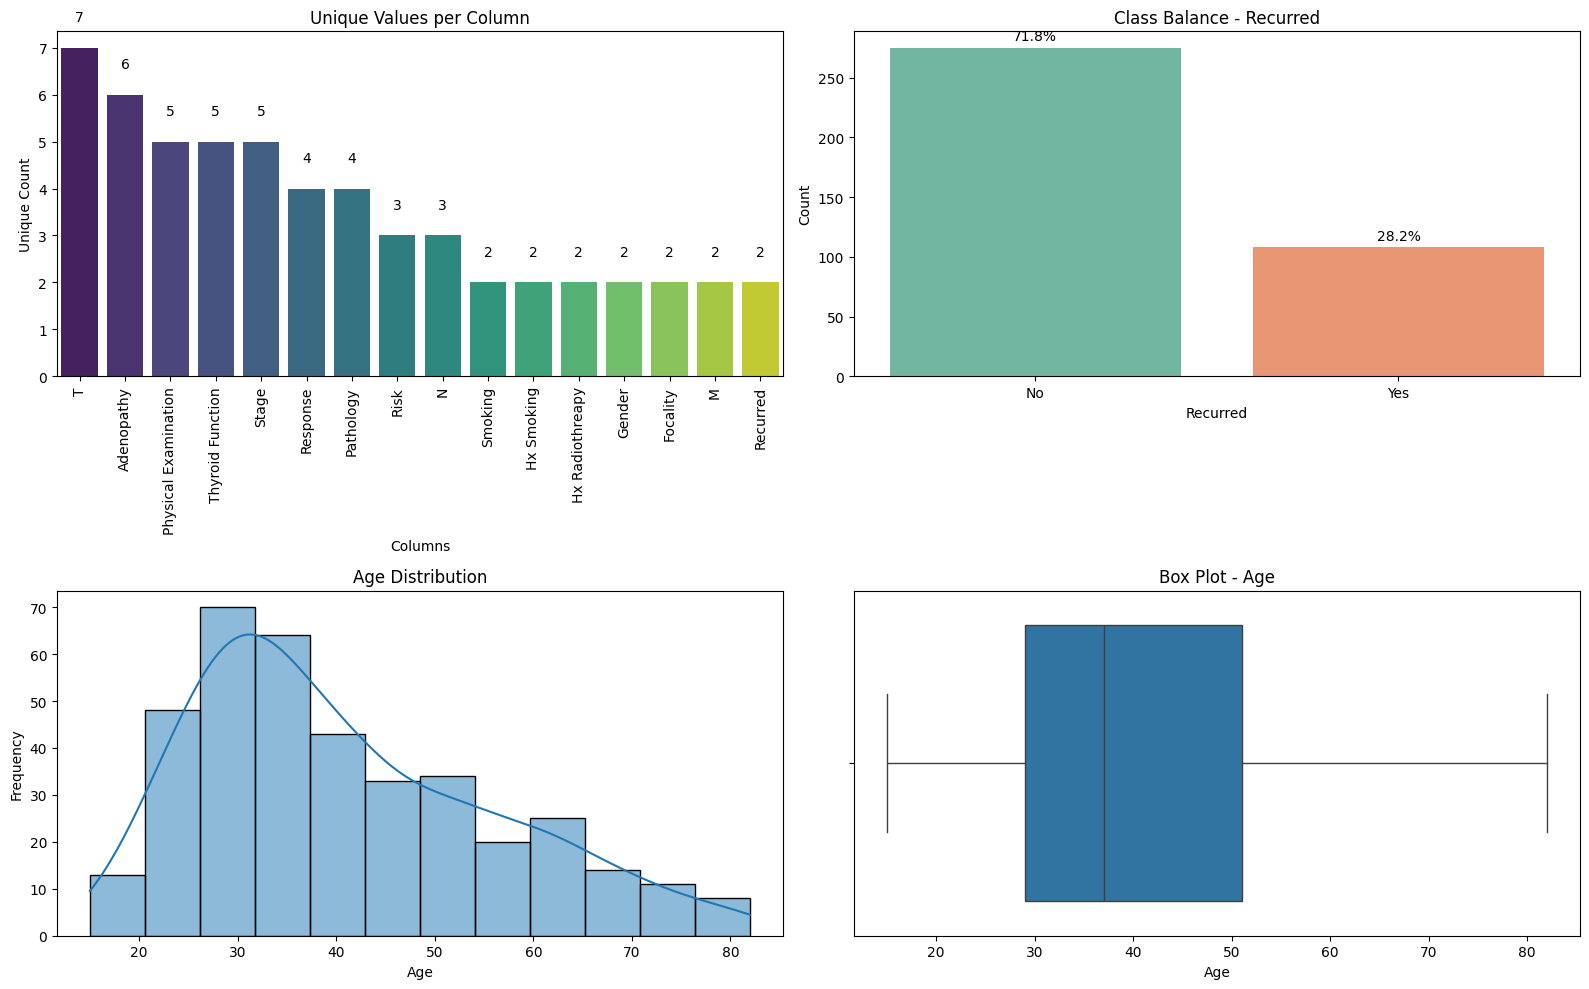

In [9]:
# Unique values per column (excluding 'Age')
unique_vals = df.drop(columns='Age').nunique().sort_values(ascending=False)

target_col = 'Recurred'

# Class balance
target_counts = df[target_col].value_counts()
target_percent = target_counts / len(df) * 100

# Start 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1 Unique values barplot
sns.barplot(
    x=unique_vals.index,
    y=unique_vals.values,
    hue=unique_vals.index,
    palette="viridis",
    legend=False,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Unique Values per Column")
axes[0, 0].set_xlabel("Columns")
axes[0, 0].set_ylabel("Unique Count")
axes[0, 0].tick_params(axis='x', rotation=90)
for i, val in enumerate(unique_vals.values):
    axes[0, 0].text(i, val + 0.5, f'{val}', ha='center', va='bottom', fontsize=10)

# 2 Class balance plot
sns.countplot(x=target_col, data=df, hue=target_col, palette="Set2", legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Class Balance - Recurred")
axes[0, 1].set_xlabel("Recurred")
axes[0, 1].set_ylabel("Count")
for p in axes[0, 1].patches:
    count = p.get_height()
    percent = 100 * count / len(df)
    axes[0, 1].text(p.get_x() + p.get_width() / 2,
                    count + 0.01 * len(df),
                    f'{percent:.1f}%',
                    ha='center', va='bottom', fontsize=10)

# 3 Age distribution
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Age Distribution")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Frequency")

# 4 Box plot of age
sns.boxplot(x=df['Age'], ax=axes[1, 1])
axes[1, 1].set_title("Box Plot - Age")
axes[1, 1].set_xlabel("Age")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()


### Observations

* **Total entries:** 383
* **Total features:** 17
* **Numerical columns:** 1 → `Age`
* **Categorical columns:** 16 (including `Recurred`)

1. **No missing values** (`Non-Null Count = 383` for all columns)
2. **Only `Age` is numeric**; all others are categorical (including TNM staging)
3. The `Recurred` column (target) is categorical → needs mapping to binary


#### 🧬 **Categorical Feature Cardinality**
| T | Adenopathy | Stage | Thyroid Function | Physical Examination | Response | Pathology | Risk | N | Gender | Focality | Hx Radiotherapy | M | Hx Smoking | Smoking |
| - | ---------- | ----- | ---------------- | -------------------- | -------- | --------- | ---- | - | ------ | -------- | --------------- | - | ---------- | ------- |
| 7 | 6          | 5     | 5                | 5                    | 4        | 4         | 3    | 2 | 2      | 2        | 2               | 2 | 2          | 2       |


Most features are **low- to mid-cardinality**, so we can use **label encoding** or **one-hot encoding**, depending on the model (e.g., one-hot for logistic regression, label for trees).

##### ⚖️ **2. Class Imbalance in Target (`Recurred`)**

* **No:** 275 (≈ 72%)
* **Yes:** 108 (≈ 28%)

➡️ **Slight class imbalance**, but not extreme. Still, consider:

* Stratified train/test split
* Use `class_weight='balanced'` (e.g., in RandomForest or Logistic Regression)
* Track **Recall / F1** especially for the minority class (`Yes`)


##### 📈 **3. Age Summary**

* Range: **15 to 82 years**
* Mean: **\~41 years**
* Likely skewed toward younger patients
* Needs **normalization** or **standardization** depending on model

In [10]:
for col in categorical_cols:
    print(f"\n--- {col} Value Counts ---")
    print(df[col].value_counts(dropna=False))


--- Gender Value Counts ---
Gender
F    312
M     71
Name: count, dtype: int64

--- Smoking Value Counts ---
Smoking
No     334
Yes     49
Name: count, dtype: int64

--- Hx Smoking Value Counts ---
Hx Smoking
No     355
Yes     28
Name: count, dtype: int64

--- Hx Radiothreapy Value Counts ---
Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64

--- Thyroid Function Value Counts ---
Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64

--- Physical Examination Value Counts ---
Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

--- Adenopathy Value Counts ---
Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extens

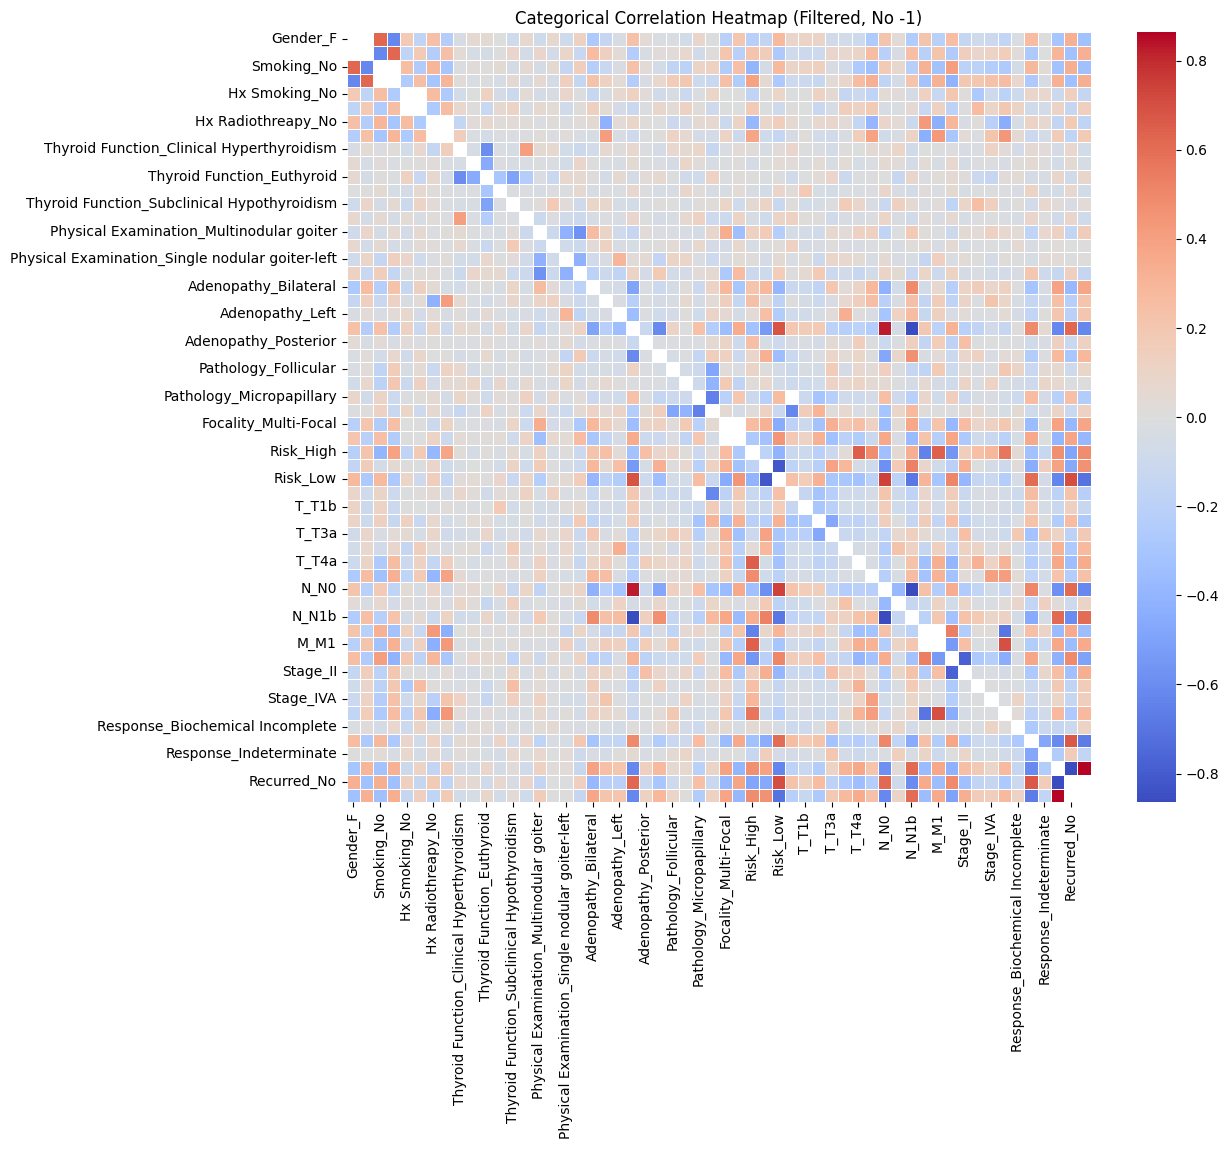

In [11]:
# Select only categorical columns
categorical_df = df[categorical_cols].copy()

# One-hot encode the filtered low-cardinality categorical features
encoded = pd.get_dummies(categorical_df, drop_first=False)

# Compute correlation matrix
corr_matrix = encoded.corr()

# Remove exact -1 correlations (typically due to mutual exclusivity)
# Mask values that are exactly -1 (or very close to it)
filtered_corr_matrix = corr_matrix.copy()
filtered_corr_matrix[(filtered_corr_matrix < -0.9)] = np.nan
filtered_corr_matrix[(filtered_corr_matrix > 0.9)] = np.nan


# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', center=0, linewidths=0.5, annot=False)
plt.title("Categorical Correlation Heatmap (Filtered, No -1)")
plt.show()


In [12]:
threshold = 0.65
print(f"Threshold: {threshold}")
high_corr_pairs = (filtered_corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                               .stack()
                               .loc[lambda x: abs(x) > threshold])
print(f"Correlated feature pairs: {len(high_corr_pairs)}\n", high_corr_pairs)


Threshold: 0.65
Correlated feature pairs: 18
 Adenopathy_No                   Risk_Low               0.684184
                                N_N0                   0.829761
                                N_N1b                 -0.860998
Pathology_Micropapillary        Pathology_Papillary   -0.654491
Risk_High                       T_T4a                  0.650152
Risk_Intermediate               Risk_Low              -0.821286
Risk_Low                        N_N0                   0.737688
                                N_N1b                 -0.682578
                                Recurred_No            0.708266
                                Recurred_Yes          -0.708266
N_N0                            N_N1b                 -0.864492
M_M0                            Stage_IVB             -0.700479
M_M1                            Stage_IVB              0.700479
Stage_I                         Stage_II              -0.779217
Response_Excellent              Recurred_No            0.6

#### Profiling

In [13]:
# !uv pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd

# Assuming your DataFrame is called df
profile = ProfileReport(df, title="Thyroid Cancer Data Profile", explorative=True)

# Export to HTML
profile.to_file("../EDA_Profile_Report.html")


c:\Users\dell\Desktop\projects\thyroid_cancer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 219.17it/s]
